In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-61.022163922543626 -106.58945383355574
-68.56108301784047 -173.11847506518242
8.501570493111103 -110.68726868840623
-71.14389287239149 177.7467268792908
77.45064320868283 -33.13859090074945
-60.451833538013894 32.06965830975716
73.60012276756149 176.6288668936865
28.93637186466917 -109.83904425707355
-0.898618388606991 -102.45132437209018
-75.05361279357393 131.27037939756838
60.869947575233 111.01690114606691
-33.87721545720105 -31.8694111442737
78.07624639781884 103.37183218039945
20.63712381286794 -46.813198347284754
-36.33054400004349 161.50703429841104
66.17225755309269 96.16785365041176
-24.855493941127264 -34.08916784027258
79.23369216546752 -149.50582898405014
78.39000191764077 36.61233064032314
-22.948276666080602 -138.88702817254142
-0.9121978975718292 115.0835087770156
-68.25683484153218 65.58018537456005
34.760063884279944 -129.74591790835228
-21.8514348220922 -105.27805425875985
-73.39740810874193 14.455189405893293
-63.66921221306944 -29.2688001051591
-21.429355546194557

82.95297414545956 -87.4083894154361
18.77983197038897 -69.55585457380356
-12.226821327556848 -158.41511366561113
-47.60838103154809 -2.304136609615739
-88.40908267128265 123.86462293562909
-83.8493967187716 -6.468167068773852
-18.446630398851582 162.08753433986675
-76.59213704886287 -159.12762481461507
-5.708934777549004 35.20155912771483
-80.81457577428625 -16.9995270274797
79.89309602922685 -21.12661827071662
35.163046992413726 12.541817593131185
43.1400114146509 115.3991758224389
9.288937455588893 -171.56706300674213
-81.29654062371927 -21.450785187769327
-5.646164732001253 57.69066360695214
1.0441604602546306 121.39585336217402
-23.83329448433996 -147.20001410329348
-2.631640834887719 -178.71049104167625
-72.96011130418657 -9.456374933905323
7.235896973036944 -131.83071138666563
32.61823244811619 -155.61803327627987
41.77090039318537 -163.56624023366976
-23.27673813311152 -21.71364152120435
-86.67468561632968 164.78097110150009
-52.31328057533821 -32.69646629144961
-52.947545305433

-1.4153905003678346 32.60986724478275
49.4137439536745 90.85331829063301
-52.72892221387579 87.89237282499602
59.40561025078202 98.09394592510773
-60.16648721691813 -157.7281725881374
74.47492328196657 -84.52818628004484
-5.085242670404952 -123.21504128678625
81.84147535608028 174.63524898900755
87.66462215136835 30.474770728175855
84.46073402933388 -51.969858639893204
-27.1989782014331 176.82781708570394
-53.52361089654507 -4.9866356688253575
79.71674510055175 151.9380651305937
-31.535371523112893 168.81104935670368
27.96969997946603 -86.93347642309938
-37.427644787578096 2.8818496680033263
-44.70624821506603 -80.80948685975333
-15.87457168409712 -76.31956866947394
19.326798996357752 -24.872309562298796
-34.814285732769065 63.82121134568891
66.41612922261515 -33.35496581758619
10.326150655190219 -175.1072066581648
76.48092121480798 -10.270733389020535
-22.536894384510532 -148.81324710376302
-23.78169311283584 -166.83934690553625
-58.067090926077356 54.52499550342171
-29.39810958636115

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ceafaa31fa4497aa86ed47f6ba9f25bd"



In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
import requests

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | sahuaripa
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | vitim
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | port macquarie
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | guarapari
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | amuntai
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 40 of Set 4 | vlakhopoulon
Processing Record 41 of Set 4 | tubruq
City not found. Skipping...
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | savannah bight
Processing Record 45 of Set 4 | abalak
Processing Record 46 of Set 4 | urumqi
Processing Record 47 of Set 4 | udachnyy
Processing Record 48 of Set 4 | ario
City not found. Skipping...
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | ningbo
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | stykkisholmur
Processing Record 3 of Set 5 | itaporanga
Processing Record 4 of Set 5 | kangaatsiaq
Processing Record 5 of Set 5 | trelew
Processing Record 6 of Set 5 | barbar
City not found. Skipping...
Processing Record 7 of Set 5 | umm bab
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | juneau
Processing Record 10 of Set 5 | tautira
Processing 

City not found. Skipping...
Processing Record 24 of Set 8 | staryy nadym
Processing Record 25 of Set 8 | porkhov
Processing Record 26 of Set 8 | daru
Processing Record 27 of Set 8 | sala
Processing Record 28 of Set 8 | sisimiut
Processing Record 29 of Set 8 | koygorodok
Processing Record 30 of Set 8 | fare
Processing Record 31 of Set 8 | santa rita
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | pervomayskiy
Processing Record 34 of Set 8 | bom jardim
Processing Record 35 of Set 8 | praya
Processing Record 36 of Set 8 | pevek
Processing Record 37 of Set 8 | gangotri
City not found. Skipping...
Processing Record 38 of Set 8 | vawkavysk
Processing Record 39 of Set 8 | henties bay
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | camacha
Processing Record 44 of Set 8 | camopi
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | bloom

Processing Record 12 of Set 12 | omsukchan
Processing Record 13 of Set 12 | zeya
Processing Record 14 of Set 12 | rodrigues alves
Processing Record 15 of Set 12 | andra
Processing Record 16 of Set 12 | antibes
Processing Record 17 of Set 12 | lander
Processing Record 18 of Set 12 | beruwala
Processing Record 19 of Set 12 | sinazongwe
Processing Record 20 of Set 12 | ndjole
Processing Record 21 of Set 12 | kashin
Processing Record 22 of Set 12 | mao
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | umm durman
City not found. Skipping...
Processing Record 25 of Set 12 | emerald
Processing Record 26 of Set 12 | pyaozerskiy
Processing Record 27 of Set 12 | shetpe
Processing Record 28 of Set 12 | victoria point
Processing Record 29 of Set 12 | ous
Processing Record 30 of Set 12 | montepuez
Processing Record 31 of Set 12 | hyeres
Processing Record 32 of Set 12 | gladstone
Processing Record 33 of Set 12 | changzhou
Processing Record 34 of Set 12 | general roca
Pr

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [35]:
## reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-06-13 20:35:06,-53.1500,-70.9167,44.71,76,0,12.66
1,Vaini,TO,2022-06-13 20:35:06,-21.2000,-175.2000,77.16,88,40,4.61
2,San Patricio,US,2022-06-13 20:35:07,28.0170,-97.5169,96.19,47,58,22.77
3,Kaitangata,NZ,2022-06-13 20:36:27,-46.2817,169.8464,41.50,86,96,18.86
4,Tasiilaq,GL,2022-06-13 20:35:08,65.6145,-37.6368,37.56,95,100,12.84


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## STEM Project

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Get today's date in seconds.
today = time.time()
today

1655155580.700195

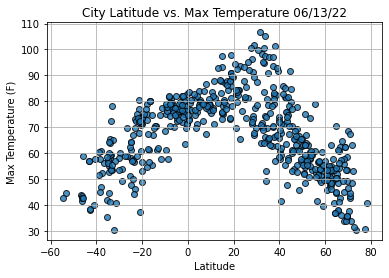

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

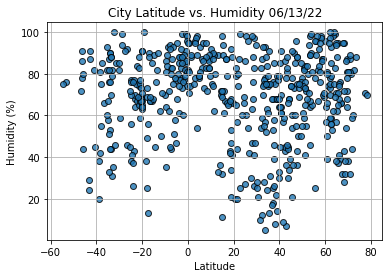

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

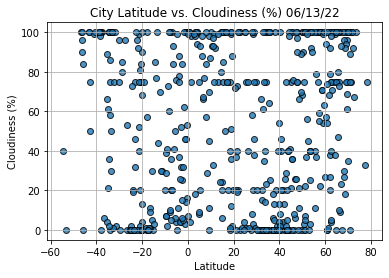

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

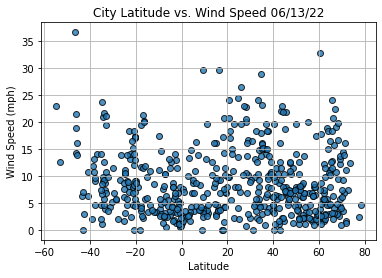

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()